In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


In [2]:
complete_dataset = pd.read_csv('covid_19_india.csv')
dropped = complete_dataset.drop([complete_dataset.index[0], complete_dataset.index[1]])
dropped.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3
6,7,05/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
d = dropped.groupby(['Date']).sum()

In [4]:
d.to_csv('monthly_covid.csv')

In [12]:
monthly_covid = pd.read_csv('monthwise_covidcases.csv')
monthly_covid.head()

,Date,Confirmed,Month
0,31/01/20,1,January
1,29/02/20,3,Februray
2,31/03/20,1397,March
3,30/04/20,33330,April
4,31/05/20,182143,May


Text(0.5, 1.0, 'Monthly Covid Trend')

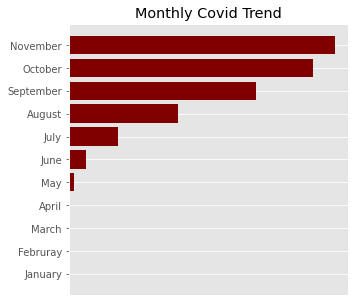

In [14]:
plt.figure(figsize=(5,5))
Month = monthly_covid.pop('Month')
Confirmed = monthly_covid.pop('Confirmed')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.style.use('ggplot')
plt.barh(Month, Confirmed, color='maroon')
plt.title('Monthly Covid Trend')

In [15]:
df = pd.read_csv("covid_19_india.csv")
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8481,8482,16/11/20,8:00 AM,Telengana,-,-,242084,1407,257876
8482,8483,16/11/20,8:00 AM,Tripura,-,-,30555,364,31962
8483,8484,16/11/20,8:00 AM,Uttarakhand,-,-,62543,1107,68215
8484,8485,16/11/20,8:00 AM,Uttar Pradesh,-,-,480965,7372,511304
8485,8486,16/11/20,8:00 AM,West Bengal,-,-,394576,7661,431551


In [16]:
data = pd.read_csv('covidcases.csv')
data.head(5)



,State/UnionTerritory,Confirmed
0,Andaman & Nicobar Island,4536
1,Andhra Pradesh,854011
2,Arunanchal Pradesh,15812
3,Assam,210268
4,Bihar,225901


In [17]:
data['percentage'] = data['Confirmed']/sum(data['Confirmed'])*100

In [18]:
data.head()

,State/UnionTerritory,Confirmed,percentage
0,Andaman & Nicobar Island,4536,0.051282
1,Andhra Pradesh,854011,9.655158
2,Arunanchal Pradesh,15812,0.178765
3,Assam,210268,2.377219
4,Bihar,225901,2.553960


In [19]:
state = data['State/UnionTerritory']
state.head(5)

0    Andaman & Nicobar Island
1              Andhra Pradesh
2          Arunanchal Pradesh
3                       Assam
4                       Bihar
Name: State/UnionTerritory, dtype: object

In [20]:
data2 = data.rename({i:state[i] for i in range(len(state))}, axis = "index")
data2.head(10)

,State/UnionTerritory,Confirmed,percentage
Andaman & Nicobar Island,Andaman & Nicobar Island,4536,0.051282
Andhra Pradesh,Andhra Pradesh,854011,9.655158
Arunanchal Pradesh,Arunanchal Pradesh,15812,0.178765
Assam,Assam,210268,2.377219
Bihar,Bihar,225901,2.553960
Chandigarh,Chandigarh,15804,0.178675
Chhattisgarh,Chhattisgarh,210534,2.380226
Dadara & Nagar Havelli,Dadara & Nagar Havelli,3291,0.037207
Daman & Diu,Daman & Diu,0,0.000000
NCT of Delhi,NCT of Delhi,485405,5.487824


In [21]:
data2.drop("State/UnionTerritory", axis = 1, inplace=True)
data2.head(10)

,Confirmed,percentage
Andaman & Nicobar Island,4536,0.051282
Andhra Pradesh,854011,9.655158
Arunanchal Pradesh,15812,0.178765
Assam,210268,2.377219
Bihar,225901,2.553960
Chandigarh,15804,0.178675
Chhattisgarh,210534,2.380226
Dadara & Nagar Havelli,3291,0.037207
Daman & Diu,0,0.000000
NCT of Delhi,485405,5.487824


In [22]:
data2= data2["Confirmed"]
data2.head(10)

Andaman & Nicobar Island      4536
Andhra Pradesh              854011
Arunanchal Pradesh           15812
Assam                       210268
Bihar                       225901
Chandigarh                   15804
Chhattisgarh                210534
Dadara & Nagar Havelli        3291
Daman & Diu                      0
NCT of Delhi                485405
Name: Confirmed, dtype: int64

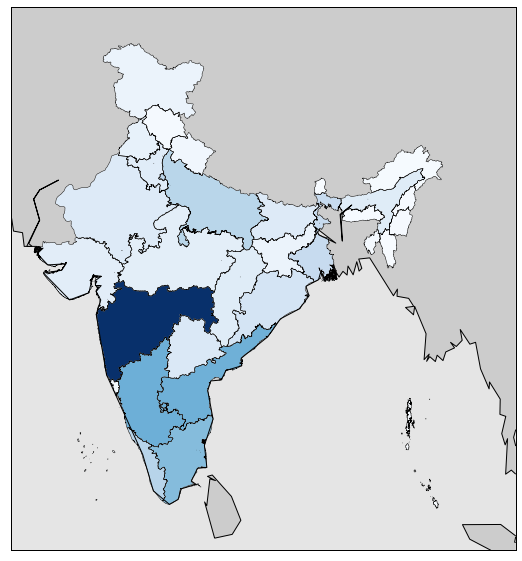

In [23]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
map = Basemap(lat_0=26, lon_0=77, llcrnrlon=68, llcrnrlat=5, urcrnrlon=105, projection= "lcc",  urcrnrlat=37.)
map.drawmapboundary()
map.fillcontinents()
map.drawcoastlines()

map.readshapefile('Indian_States', 'IndianStates')

nv= matplotlib.colors.Normalize(vmin=data['Confirmed'].min(), vmax=data['Confirmed'].max())
cmap=cm.Blues
col_map=cm.ScalarMappable(norm=nv, cmap=cmap)
colors=[]
patch=[]

for  x,y  in zip(map.IndianStates_info, map.IndianStates):
     st = x["st_nm"]
     color = col_map.to_rgba(data2[st])
     poly=Polygon(np.array(y), facecolor=color, edgecolor='white')
     ax.add_patch(poly)
     patch.append(poly)
     colors.append(color)


In [56]:

oldage = pd.read_csv("oldage3.csv")
oldage.head(5)

,State/UnionTerritory,Rounded Percentage
0,Andaman & Nicobar Island,67
1,Andhra Pradesh,98
2,Arunanchal Pradesh,46
3,Assam,67
4,Bihar,74


Text(0.5, 1.0, 'Statewise Oladage Trend')

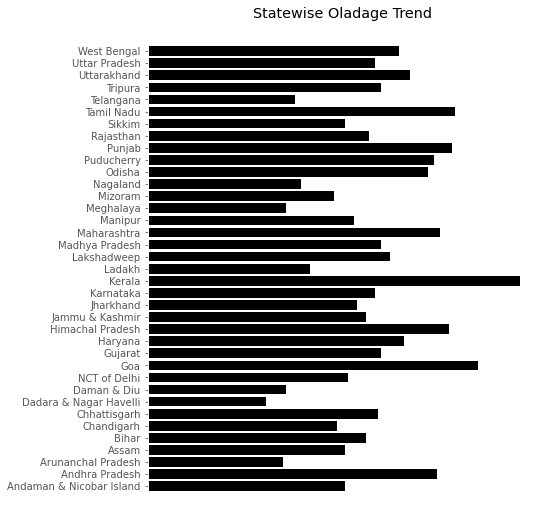

In [54]:
plt.figure(figsize=(7,9))
ax = plt.axes()
ax.set_facecolor('white')
State_UnionTerritory = oldage.pop('State/UnionTerritory')
Rounded_Percentage = oldage.pop('Rounded Percentage')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.style.use('ggplot')
plt.barh(State_UnionTerritory, Rounded_Percentage, color='black')
plt.title('Statewise Oladage Trend')

In [57]:
sat = oldage['State/UnionTerritory']
sat.tail(10)

27       Puducherry
28           Punjab
29        Rajasthan
30           Sikkim
31       Tamil Nadu
32        Telangana
33          Tripura
34      Uttarakhand
35    Uttar Pradesh
36      West Bengal
Name: State/UnionTerritory, dtype: object

In [58]:
data_oldage = oldage.rename({i:sat[i] for i in range(len(state))}, axis = "index")
data_oldage.tail(10)

,State/UnionTerritory,Rounded Percentage
Puducherry,Puducherry,97
Punjab,Punjab,103
Rajasthan,Rajasthan,75
Sikkim,Sikkim,67
Tamil Nadu,Tamil Nadu,104
Telangana,Telangana,50
Tripura,Tripura,79
Uttarakhand,Uttarakhand,89
Uttar Pradesh,Uttar Pradesh,77
West Bengal,West Bengal,85


In [59]:
data_oldage.drop("State/UnionTerritory",axis = 1, inplace=True)
data_oldage.head(5)

,Rounded Percentage
Andaman & Nicobar Island,67
Andhra Pradesh,98
Arunanchal Pradesh,46
Assam,67
Bihar,74


In [60]:
data_oldage = data_oldage['Rounded Percentage']
data_oldage.head(5)

Andaman & Nicobar Island    67
Andhra Pradesh              98
Arunanchal Pradesh          46
Assam                       67
Bihar                       74
Name: Rounded Percentage, dtype: int64

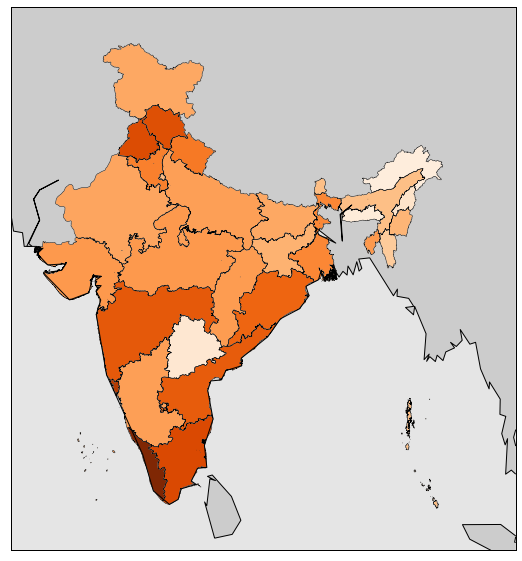

In [61]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
map = Basemap(lat_0=26, lon_0=77, llcrnrlon=68, llcrnrlat=5, urcrnrlon=105, projection= "lcc",  urcrnrlat=37.)
map.drawmapboundary()
map.fillcontinents()
map.drawcoastlines()

map.readshapefile('Indian_States', 'IndianStates')

nv= matplotlib.colors.Normalize(vmin=oldage['Rounded Percentage'].min(), vmax=oldage['Rounded Percentage'].max())
cmap=cm.Oranges
col_map=cm.ScalarMappable(norm=nv, cmap=cmap)
colors=[]
patch=[]

for  x,y  in zip(map.IndianStates_info, map.IndianStates):
     st = x["st_nm"]
     color = col_map.to_rgba(data_oldage[st])
     poly=Polygon(np.array(y), facecolor=color, edgecolor='white')
     ax.add_patch(poly)
     patch.append(poly)
     colors.append(color)

In [62]:
df1 = pd.read_csv("TestA.csv")
df1.head(5)
df1.shape

(75, 7)

In [63]:
df2 = pd.read_csv("TestA1.csv")
df2.tail(5)
df2.shape

(334, 7)

In [64]:
df3 = pd.read_csv("TestB.csv")
df3.shape

(315, 7)

In [65]:
df4 = pd.read_csv("TestC.csv")
df4.shape

(460, 7)

In [66]:
df5 = pd.read_csv("TestD.csv")
df5.shape

(991, 7)

In [67]:
df6 = pd.read_csv("TestE.csv")
df6.shape

(4151, 7)

In [68]:
df7 = pd.read_csv("TestF.csv")
df7.shape

(2158, 7)

In [69]:
new_df  = pd.concat([df1,df2] , ignore_index = True)
new_df.head()

,Latitude,Longitude,STATION_NAME,STATION_CODE,DIVISION,STATE,CATEGORY
0,17.722201,83.289261,VISAKHAPATNAM,VSKP,WAT,ANDHRA PRADESH,A1
1,17.392422,78.468999,HYDERABAD ...,HYB,SC,ANDHRA PRADESH,A1
2,17.390647,78.500909,KACHEGUDA,KCG,HYB,ANDHRA PRADESH,A1
3,17.433709,78.501614,SECUNDERABAD JN ...,SC,SC,ANDHRA PRADESH,A1
4,13.628347,79.419978,TIRUPATI,TPTY,GTL,ANDHRA PRADESH,A1


In [70]:
second_new_df = pd.concat([df3,df4], ignore_index = True)
second_new_df.head()

,Latitude,Longitude,STATION_NAME,STATION_CODE,DIVISION,STATE,CATEGORY
0,18.332733,82.865247,ARAKU,ARK,WAT,ANDHRA PRADESH,B
1,18.576340,83.345916,BOBBILI,VBL,WAT,ANDHRA PRADESH,B
2,18.275218,83.040020,BORRAGUHALU,BGHU,WAT,ANDHRA PRADESH,B
3,17.703076,83.150997,DUVVADA,DVD,WAT,ANDHRA PRADESH,B
4,19.111381,84.680627,ICHCHHAPURAM,IPM,KUR,ANDHRA PRADESH,B


In [71]:
joined_new_df = pd.concat([new_df, second_new_df], ignore_index = True)
joined_new_df.head()

,Latitude,Longitude,STATION_NAME,STATION_CODE,DIVISION,STATE,CATEGORY
0,17.722201,83.289261,VISAKHAPATNAM,VSKP,WAT,ANDHRA PRADESH,A1
1,17.392422,78.468999,HYDERABAD ...,HYB,SC,ANDHRA PRADESH,A1
2,17.390647,78.500909,KACHEGUDA,KCG,HYB,ANDHRA PRADESH,A1
3,17.433709,78.501614,SECUNDERABAD JN ...,SC,SC,ANDHRA PRADESH,A1
4,13.628347,79.419978,TIRUPATI,TPTY,GTL,ANDHRA PRADESH,A1


In [72]:
part_new_df = pd.concat([df5,df6], ignore_index = True)
part_new_df.head()

,Latitude,Longitude,STATION_NAME,STATION_CODE,DIVISION,STATE,CATEGORY
0,18.316683,83.570132,CHIPURUPALLE,CPP,WAT,ANDHRA PRADESH,D
1,16.709965,81.110238,KOTABOMMALI,KBM,WAT,ANDHRA PRADESH,D
2,17.891690,83.185918,KOTTAVALASA,KTV,WAT,ANDHRA PRADESH,D
3,18.579191,84.283289,NAUPADA,NWP,WAT,ANDHRA PRADESH,D
4,18.771155,83.427866,PARVATIPURAM,PVP,WAT,ANDHRA PRADESH,D


In [73]:
next_joined_df = pd.concat([part_new_df,df7], ignore_index = True)
next_joined_df.head()

,Latitude,Longitude,STATION_NAME,STATION_CODE,DIVISION,STATE,CATEGORY
0,18.316683,83.570132,CHIPURUPALLE,CPP,WAT,ANDHRA PRADESH,D
1,16.709965,81.110238,KOTABOMMALI,KBM,WAT,ANDHRA PRADESH,D
2,17.891690,83.185918,KOTTAVALASA,KTV,WAT,ANDHRA PRADESH,D
3,18.579191,84.283289,NAUPADA,NWP,WAT,ANDHRA PRADESH,D
4,18.771155,83.427866,PARVATIPURAM,PVP,WAT,ANDHRA PRADESH,D


In [74]:
real_df = pd.concat([joined_new_df, next_joined_df], ignore_index = True)
real_df.tail()

,Latitude,Longitude,STATION_NAME,STATION_CODE,DIVISION,STATE,CATEGORY
8479,21.773315,87.671501,SITALPUR,STLB,KGP,WEST BENGAL,F
8480,23.293520,87.414787,SONAMUKHI,SONA,ADA,WEST BENGAL,F
8481,22.754032,88.338555,SRIRAMPUR,SIMR,ADA,WEST BENGAL,F
8482,22.689262,88.447703,SUJALPUR,SJPA,KGP,WEST BENGAL,F
8483,21.667356,87.534775,TIKRA,TKRA,KGP,WEST BENGAL,F


In [75]:
monthly = real_df.groupby(['STATE']).count()
monthly.dtypes


Latitude        int64
Longitude       int64
STATION_NAME    int64
STATION_CODE    int64
DIVISION        int64
CATEGORY        int64
dtype: object

In [76]:
monthly.to_csv('file1.csv')

In [77]:
real_df.shape

(8484, 7)

In [78]:
real_df.dtypes

Latitude        float64
Longitude       float64
STATION_NAME     object
STATION_CODE     object
DIVISION         object
STATE            object
CATEGORY         object
dtype: object

In [79]:
new_longitude = real_df['Longitude'].tolist()
new_latitude =  real_df['Latitude'].tolist()

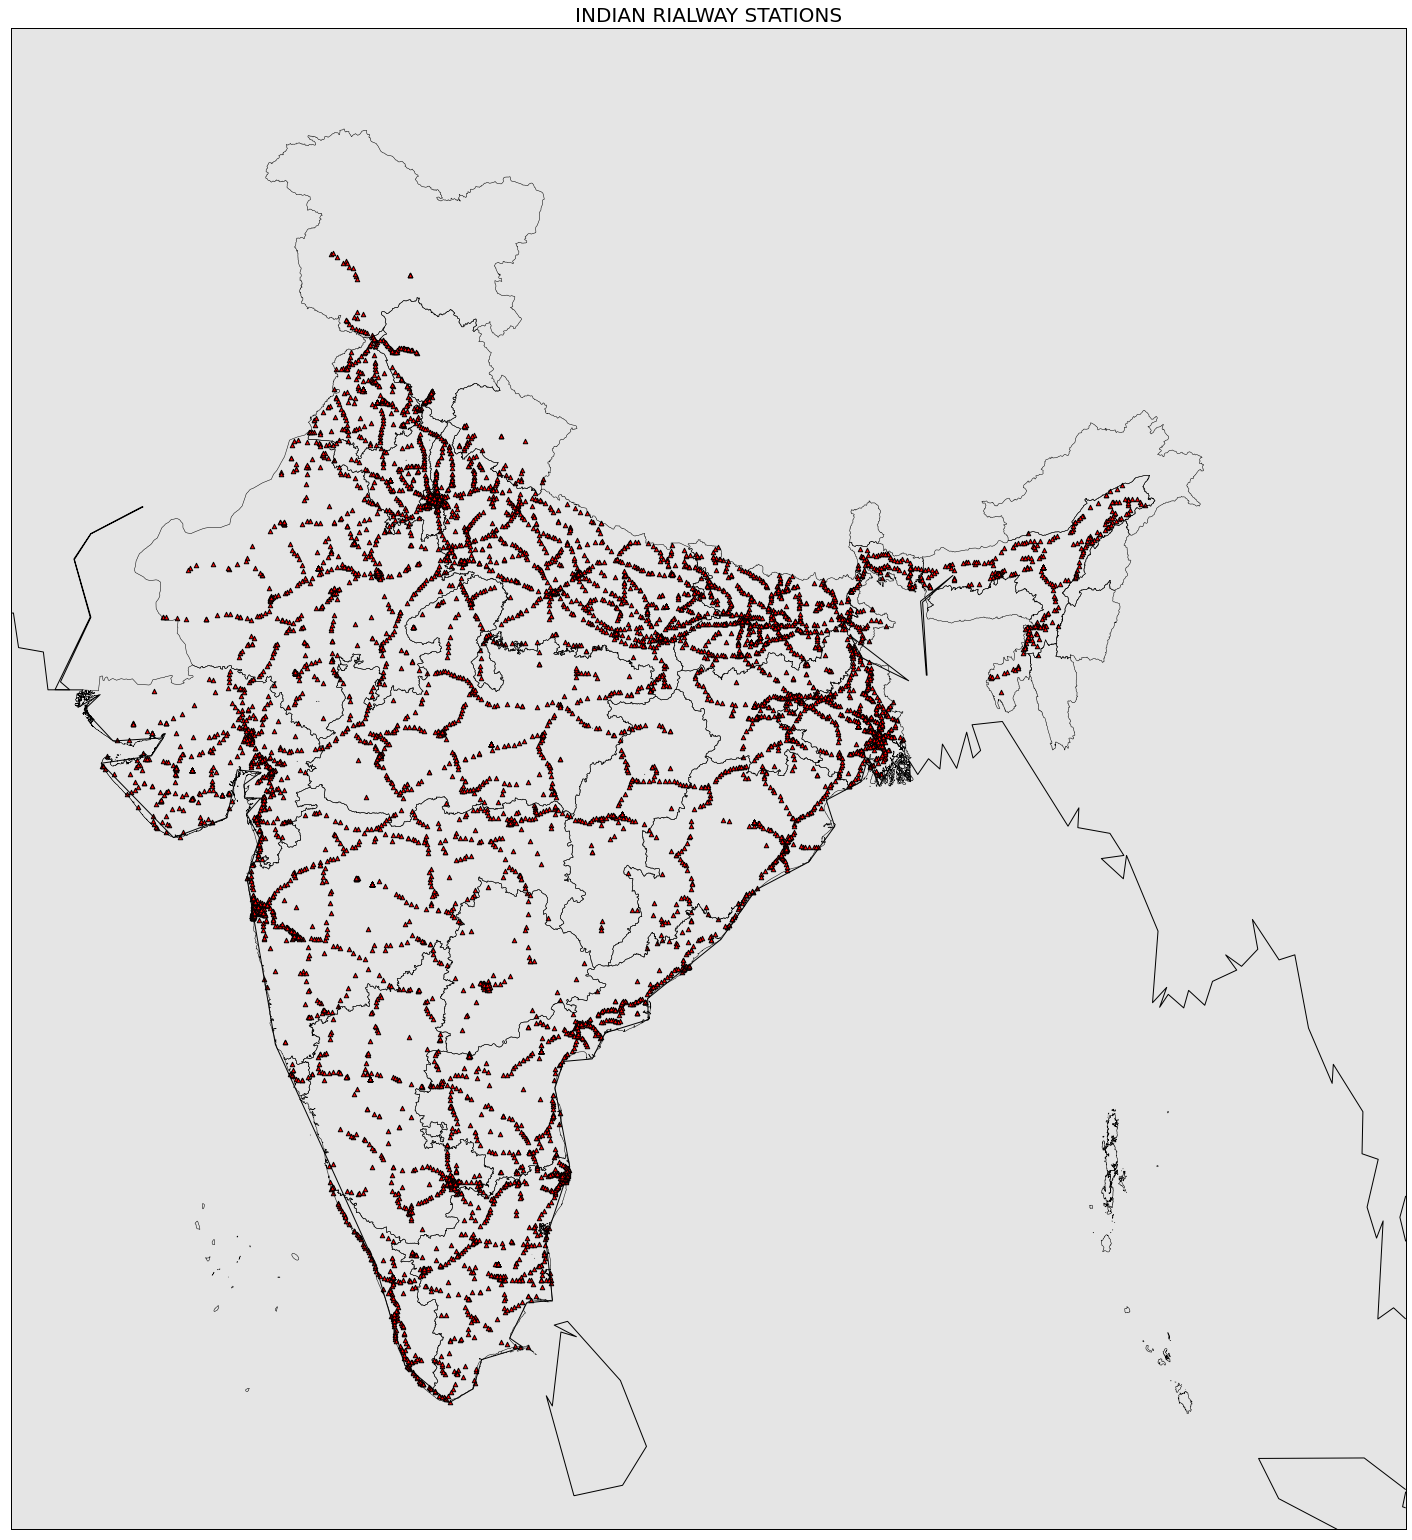

In [80]:
fig = plt.figure(figsize=(25,30))

map = Basemap(lat_0=26, lon_0=77, llcrnrlon=68, llcrnrlat=5, urcrnrlon=105, projection= "lcc",  urcrnrlat=37.)
map.drawmapboundary()
map.readshapefile('Indian_States', 'IndianStates')
map.drawcoastlines()
map.scatter(new_longitude, new_latitude, latlon=True, s=20, c='red', marker='^', alpha=1, edgecolor='k', linewidth=1)
plt.title('INDIAN RIALWAY STATIONS',fontsize=20)
plt.show()

In [81]:
station_map = pd.read_csv('file2.csv')
station_map.head(5)

,STATE,Latitude
0,Andaman & Nicobar Island,0
1,Andhra Pradesh,658
2,Arunanchal Pradesh,1
3,Assam,289
4,Bihar,721


In [82]:
sa = station_map['STATE']
sa.tail(5)

31        Telangana
32          Tripura
33    Uttar Pradesh
34      Uttarakhand
35      West Bengal
Name: STATE, dtype: object

In [83]:
data_station_map = station_map.rename({i:sa[i] for i in range(len(sa))}, axis = "index")
data_station_map.head(10)

,STATE,Latitude
Andaman & Nicobar Island,Andaman & Nicobar Island,0
Andhra Pradesh,Andhra Pradesh,658
Arunanchal Pradesh,Arunanchal Pradesh,1
Assam,Assam,289
Bihar,Bihar,721
Chandigarh,Chandigarh,1
Chhattisgarh,Chhattisgarh,140
Dadara & Nagar Havelli,Dadara & Nagar Havelli,0
Daman & Diu,Daman & Diu,0
NCT of Delhi,NCT of Delhi,46


In [84]:
data_station_map.drop("STATE", axis=1, inplace= True)
data_station_map.head(5)

,Latitude
Andaman & Nicobar Island,0
Andhra Pradesh,658
Arunanchal Pradesh,1
Assam,289
Bihar,721


In [85]:
data_station_map = data_station_map['Latitude']
data_station_map.head(5)

Andaman & Nicobar Island      0
Andhra Pradesh              658
Arunanchal Pradesh            1
Assam                       289
Bihar                       721
Name: Latitude, dtype: int64

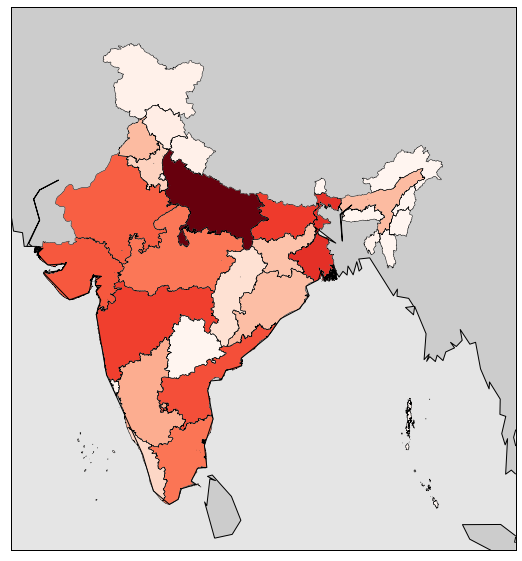

In [86]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
map = Basemap(lat_0=26, lon_0=77, llcrnrlon=68, llcrnrlat=5, urcrnrlon=105, projection= "lcc",  urcrnrlat=37.)
map.drawmapboundary()
map.fillcontinents()
map.drawcoastlines()

map.readshapefile('Indian_States', 'IndianStates')

nv= matplotlib.colors.Normalize(vmin=station_map['Latitude'].min(), vmax=station_map['Latitude'].max())
cmap=cm.Reds
col_map=cm.ScalarMappable(norm=nv, cmap=cmap)
colors=[]
patch=[]

for  x,y  in zip(map.IndianStates_info, map.IndianStates):
     st = x["st_nm"]
     color = col_map.to_rgba(data_station_map[st])
     poly=Polygon(np.array(y), facecolor=color, edgecolor='white')
     ax.add_patch(poly)
     patch.append(poly)
     colors.append(color)

In [87]:
data.head(5)
data.shape

(37, 3)

In [88]:
oldage.head(5)
oldage.shape

(37, 2)

In [89]:
station_map.head(5)
renamed_station_map = station_map.rename(columns= {'STATE': 'State/UnionTerritory', 'Latitude':'Number of Railway Station'})
renamed_station_map.head(5)

,State/UnionTerritory,Number of Railway Station
0,Andaman & Nicobar Island,0
1,Andhra Pradesh,658
2,Arunanchal Pradesh,1
3,Assam,289
4,Bihar,721


In [90]:
prefer = pd.merge(data, oldage, on = 'State/UnionTerritory')
prefer.head(5)


,State/UnionTerritory,Confirmed,percentage,Rounded Percentage
0,Andaman & Nicobar Island,4536,0.051282,67
1,Andhra Pradesh,854011,9.655158,98
2,Arunanchal Pradesh,15812,0.178765,46
3,Assam,210268,2.377219,67
4,Bihar,225901,2.553960,74


In [91]:
preference = pd.merge(prefer, renamed_station_map, on ='State/UnionTerritory')
preference.head(5)

,State/UnionTerritory,Confirmed,percentage,Rounded Percentage,Number of Railway Station
0,Andaman & Nicobar Island,4536,0.051282,67,0
1,Andhra Pradesh,854011,9.655158,98,658
2,Arunanchal Pradesh,15812,0.178765,46,1
3,Assam,210268,2.377219,67,289
4,Bihar,225901,2.553960,74,721


In [92]:
preference = preference.rename(columns={'Confirmed':'Total Covid Cases','Rounded Percentage':'Oldage Percentage'})
preference.head(5)

,State/UnionTerritory,Total Covid Cases,percentage,Oldage Percentage,Number of Railway Station
0,Andaman & Nicobar Island,4536,0.051282,67,0
1,Andhra Pradesh,854011,9.655158,98,658
2,Arunanchal Pradesh,15812,0.178765,46,1
3,Assam,210268,2.377219,67,289
4,Bihar,225901,2.553960,74,721


In [93]:
preference['Vaccine Preference'] =  preference['Total Covid Cases'] + preference['Oldage Percentage'] + preference['Number of Railway Station']
preference.head(5)
preference.to_csv("final.csv")

In [103]:
final_map = pd.read_csv('final.csv')
final_map.head(5)

,Unnamed: 0,State/UnionTerritory,Total Covid Cases,percentage,Oldage Percentage,Number of Railway Station,Vaccine Preference
0,0,Andaman & Nicobar Island,4536,0.051282,67,0,4603
1,1,Andhra Pradesh,854011,9.655158,98,658,854767
2,2,Arunanchal Pradesh,15812,0.178765,46,1,15859
3,3,Assam,210268,2.377219,67,289,210624
4,4,Bihar,225901,2.553960,74,721,226696


Text(0.5, 1.0, 'Vaccine Preference Trend')

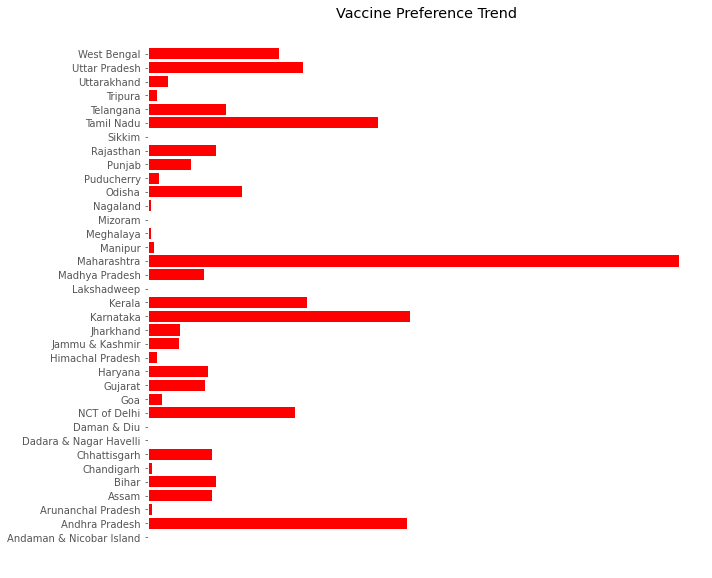

In [105]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_facecolor('white')
STATES = final_map.pop('State/UnionTerritory')
vaccine = final_map.pop('Vaccine Preference')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.style.use('ggplot')
plt.barh(STATES, vaccine, color='red')
plt.title('Vaccine Preference Trend')

In [71]:
de = final_map['State/UnionTerritory']
de.head(6)

0    Andaman & Nicobar Island
1              Andhra Pradesh
2          Arunanchal Pradesh
3                       Assam
4                       Bihar
5                  Chandigarh
Name: State/UnionTerritory, dtype: object

In [72]:
data_final_map = final_map.rename({i:de[i] for i in range(len(de))}, axis = "index")
data_final_map.head(10)

,Unnamed: 0,State/UnionTerritory,Total Covid Cases,Oldage Percentage,Number of Railway Station,Vaccine Preference
Andaman & Nicobar Island,0,Andaman & Nicobar Island,4536,67,0,4603
Andhra Pradesh,1,Andhra Pradesh,854011,98,658,854767
Arunanchal Pradesh,2,Arunanchal Pradesh,15812,46,1,15859
Assam,3,Assam,210268,67,289,210624
Bihar,4,Bihar,225901,74,721,226696
Chandigarh,5,Chandigarh,15804,64,1,15869
Chhattisgarh,6,Chhattisgarh,210534,78,140,210752
Dadara & Nagar Havelli,7,Dadara & Nagar Havelli,3291,40,0,3331
Daman & Diu,8,Daman & Diu,0,47,0,47
NCT of Delhi,9,NCT of Delhi,485405,68,46,485519


In [73]:
data_final_map.drop("State/UnionTerritory", axis=1, inplace= True)
data_final_map.head(5)

,Unnamed: 0,Total Covid Cases,Oldage Percentage,Number of Railway Station,Vaccine Preference
Andaman & Nicobar Island,0,4536,67,0,4603
Andhra Pradesh,1,854011,98,658,854767
Arunanchal Pradesh,2,15812,46,1,15859
Assam,3,210268,67,289,210624
Bihar,4,225901,74,721,226696


In [74]:
data_final_map = data_final_map['Vaccine Preference']
data_final_map.head(5)

Andaman & Nicobar Island      4603
Andhra Pradesh              854767
Arunanchal Pradesh           15859
Assam                       210624
Bihar                       226696
Name: Vaccine Preference, dtype: int64

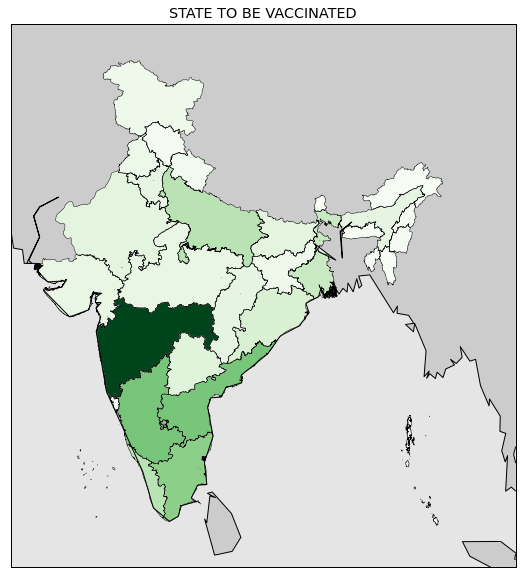

In [75]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
map = Basemap(lat_0=26, lon_0=77, llcrnrlon=68, llcrnrlat=5, urcrnrlon=105, projection= "lcc",  urcrnrlat=37.)
map.drawmapboundary()
map.fillcontinents()
map.drawcoastlines()
plt.title('STATE TO BE VACCINATED')

map.readshapefile('Indian_States', 'IndianStates')

nv= matplotlib.colors.Normalize(vmin=final_map['Vaccine Preference'].min(), vmax=final_map['Vaccine Preference'].max())
cmap=cm.Greens
col_map=cm.ScalarMappable(norm=nv, cmap=cmap)
colors=[]
patch=[]

for  x,y  in zip(map.IndianStates_info, map.IndianStates):
     st = x["st_nm"]
     color = col_map.to_rgba(data_final_map[st])
     poly=Polygon(np.array(y), facecolor=color, edgecolor='white')
     ax.add_patch(poly)
     patch.append(poly)
     colors.append(color)